<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/Linear_Regression(Task3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
df = pd.read_csv("insurance.csv")
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (1070, 8)
X_test shape : (268, 8)
y_train shape: (1070,)
y_test shape : (268,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept (β₀):", model.intercept_)
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:20} : {coef: .2f}")


Intercept (β₀): -11931.21905032666

Feature Coefficients:
age                  :  256.98
bmi                  :  337.09
children             :  425.28
sex_male             : -18.59
smoker_yes           :  23651.13
region_northwest     : -370.68
region_southeast     : -657.86
region_southwest     : -809.80


In [18]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print("\n Evaluation Metrics")
print("MAE :", round(mae, 2))
print("MSE :", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))



 Evaluation Metrics
MAE : 4181.19
MSE : 33596915.85
RMSE: 5796.28
R²  : 0.7836


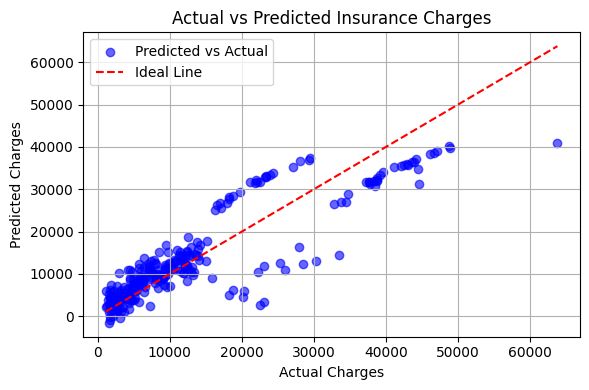

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
